## MOVIE ANALYSIS

### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


### Read in Data and Look at 

In [2]:
df = pd.read_csv('./movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### TASK 1: Find missing Data

In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


#### Can see we have rows with missing data. We will drop those rows

In [4]:
df = df.dropna()
df[df.isnull().any(axis = 1)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


### TASK 2: Fix numeric data to remove decimal 

In [5]:
cols = ['budget','gross','votes','runtime']

for col in cols:
    df[col] = df[col].astype('int64')

### TASK 4: Fix Correct Year of Release

In [6]:
import re
#Need to import regex to accout for released columns that arent in form 
#For columns that dont have an exact date only a year is provided

def split_date(date):
    split = date.split(',')
    if len(split)!=2:

        date = (re.findall('\d+',date)[0]) 
    
    else:
        date = (split[1].strip()[:4])
    
    return int(date)

df['Year_Correct'] = df['released'].apply(lambda x: split_date(x))

In [7]:
df.sort_values(by=['budget'],inplace = False,ascending=False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Correct
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152,2017
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169,2007
7463,Star Wars: Episode IX - The Rise of Skywalker,PG-13,Action,2019,"December 20, 2019 (United States)",6.5,394000,J.J. Abrams,Chris Terrio,Daisy Ridley,United States,275000000,1078232589,Walt Disney Pictures,141,2019
7261,Solo: A Star Wars Story,PG-13,Action,2018,"May 25, 2018 (United States)",6.9,306000,Ron Howard,Jonathan Kasdan,Alden Ehrenreich,United States,275000000,392924807,Lucasfilm,135,2018
4870,Superman Returns,PG-13,Action,2006,"June 28, 2006 (United States)",6.0,274000,Bryan Singer,Michael Dougherty,Brandon Routh,United States,270000000,391081192,Warner Bros.,154,2006
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118,2019
5658,Tangled,PG,Animation,2010,"November 24, 2010 (United States)",7.7,417000,Nathan Greno,Dan Fogelman,Mandy Moore,United States,260000000,592462816,Walt Disney Animation Studios,100,2010


### TASK 5: Find Correlations in Budget

#### TASK 5 A: Build Scatter plot with budget vs gross 

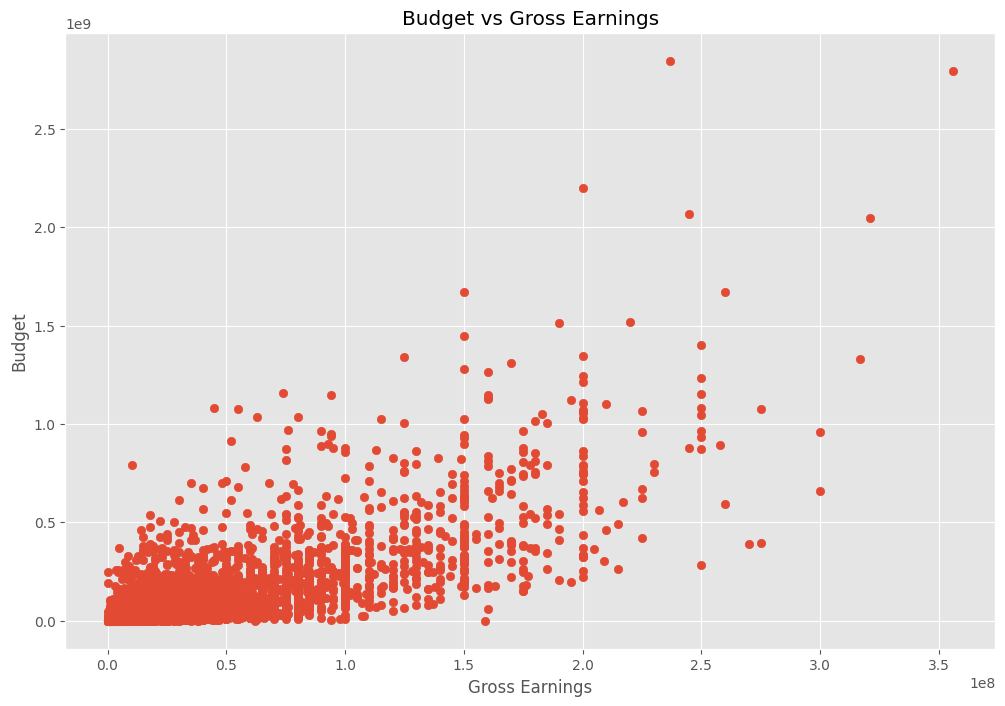

In [8]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()

#### TASK 5 B: Plot Budget vs Gross seaborn

<AxesSubplot: xlabel='budget', ylabel='gross'>

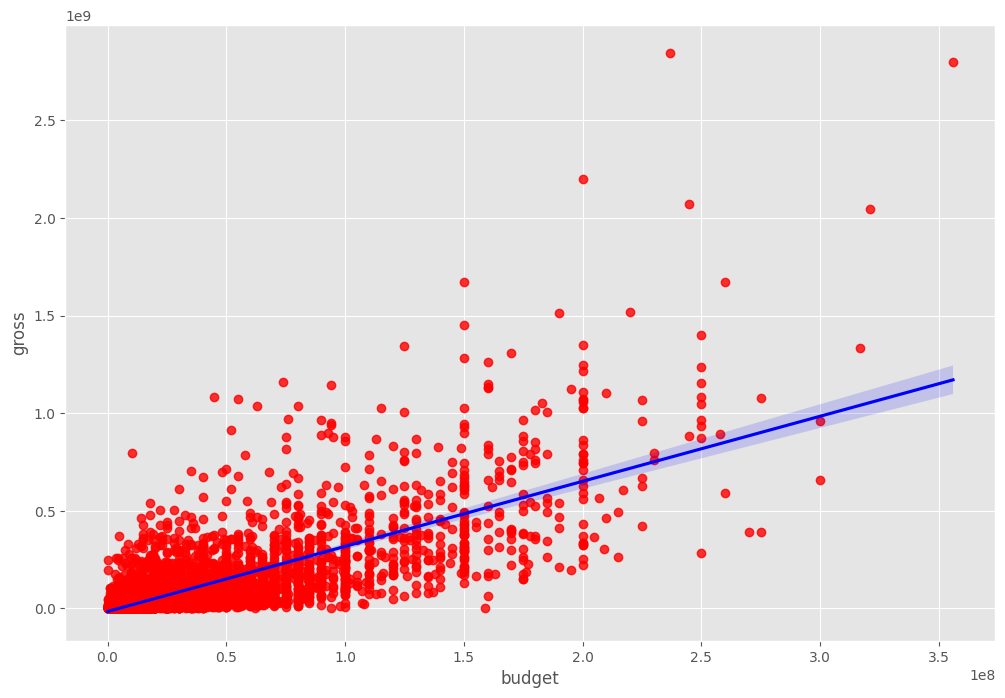

In [9]:
sns.regplot(x='budget',y='gross',data = df, scatter_kws={'color':'red'},line_kws = {'color':'blue'})

#### TASK 5 C: Using DF to find correlation
#### Using seaborn heatmap to see high correlations visually

/var/folders/nx/h1b8rcfx71v_7xxcdh7hdslc0000gn/T/ipykernel_28874/1000304138.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


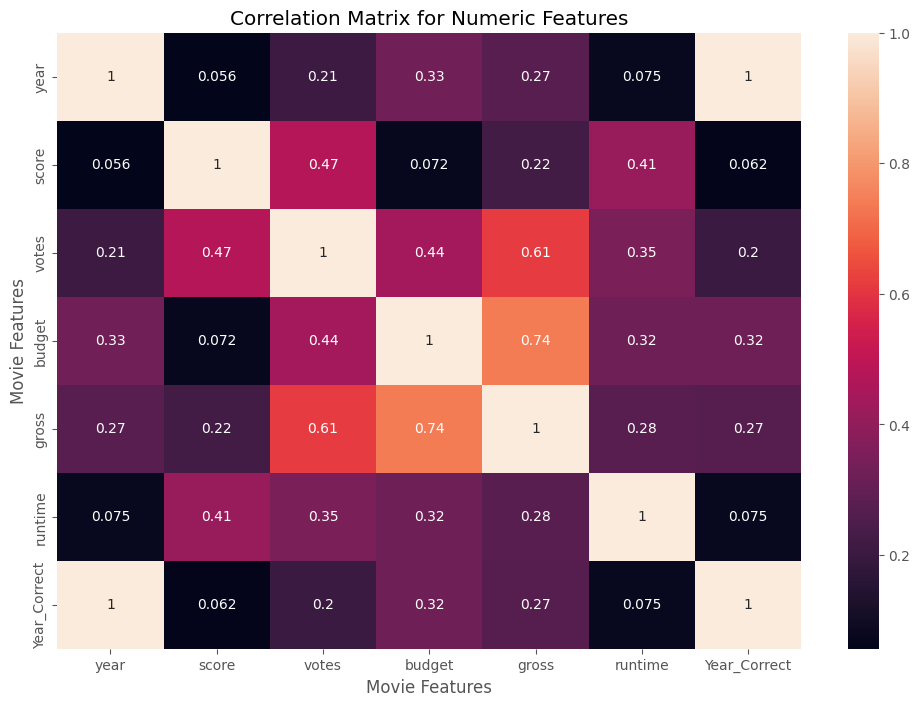

In [10]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


#### Can see the high correlation between budget and gross. Second is votes and gross

### TASK 6: Find Correlation in Company

#### Numerize dataset for nonnumeric columns

In [11]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Correct
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1980
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1980
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1980
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1980
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1980


#### Create SNS heatmap for numerized dataframe

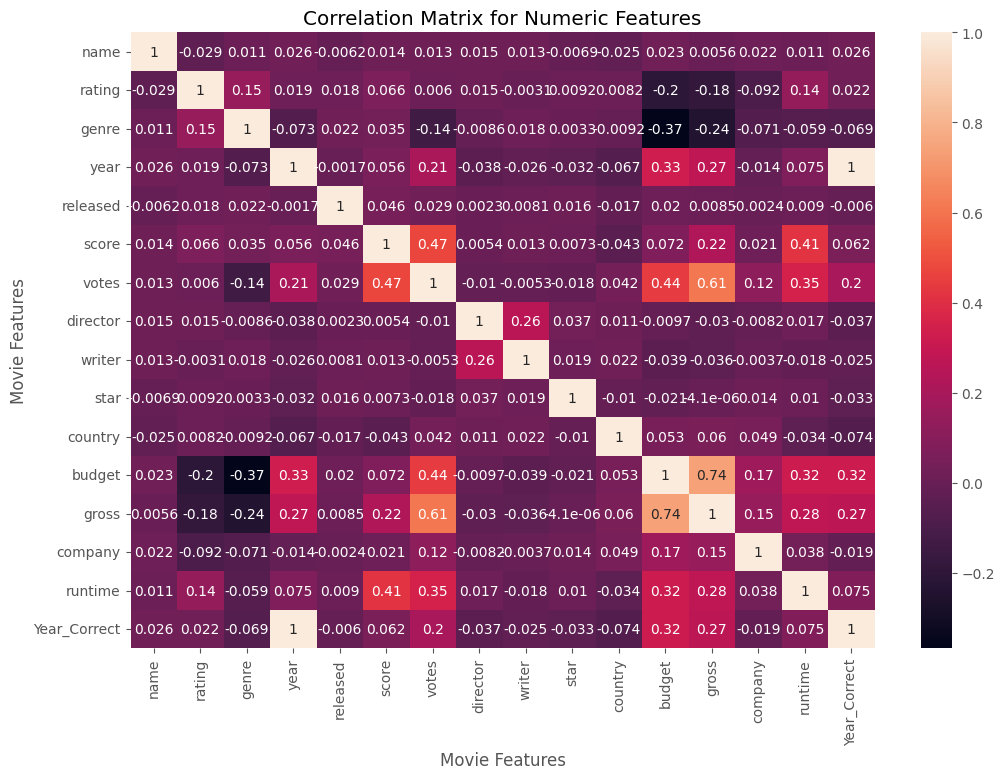

In [12]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

#### Sort Correlations

In [13]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
                                ...   
Year_Correct  budget          0.320312
              gross           0.268721
              company        -0.018806
              runtime         0.075294
              Year_Correct    1.000000
Length: 256, dtype: float64

In [14]:
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[sorted_pairs>0.5]
high_corr

gross         votes           0.614751
votes         gross           0.614751
gross         budget          0.740247
budget        gross           0.740247
year          Year_Correct    0.998726
Year_Correct  year            0.998726
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
Year_Correct  Year_Correct    1.000000
dtype: float64

#### Votes and Budget have the highest correlation to gross earnings 

### TASK 7: Direrctor budget and average movie rating

#### Directors who average the highest score

In [41]:
df.groupby('director')['score'].mean().sort_values(ascending = False)

director
Roberto Benigni       8.600
Tony Kaye             8.500
Nadine Labaki         8.400
Bob Persichetti       8.400
Sergio Leone          8.400
                      ...  
Jason Friedberg       2.625
Rod Amateau           2.600
Roger Christian       2.500
Farhad Mann           2.500
Vondie Curtis-Hall    2.300
Name: score, Length: 2063, dtype: float64

In [54]:
df['budget'].corr(df['score'])

0.072000657064456

#### On second look budget has no correlation with score. It would make sense that the more money put into the movie the higher the score would be but this shows otherwise.

### TASK 8: Which movie rating produces highest score? Genre?

In [20]:
df.groupby('rating').apply(lambda x: x.sort_values('score'))

name    rating      genre  \
rating                                                                     
Approved 120                     Tarzan the Ape Man  Approved  Adventure   
G        3409              Barney's Great Adventure         G  Adventure   
         3761         Thomas and the Magic Railroad         G  Adventure   
         4200                     The Country Bears         G     Comedy   
         6001  Alvin and the Chipmunks: Chipwrecked         G  Animation   
...                                             ...       ...        ...   
Unrated  691                            Re-Animator   Unrated     Comedy   
         2816                     The White Balloon   Unrated      Drama   
         3293                             Happiness   Unrated     Comedy   
         3647                   Requiem for a Dream   Unrated      Drama   
X        1065                           Angel Heart         X     Horror   

               year                           released  score   votes  \
rating                                                                  
Approved 120   1981      July 24, 1981 (United States)    3.4    5300   
G        3409  1998      April 3, 1998 (United States)    3.2    3200   
         3761  2000      July 26, 2000 (United States)    4.2    3900   
         4200  2002      July 26, 2002 (United States)    4.2    5200   
         6001  2011  December 16, 2011 (United States)    4.3   33000   
...             ...                                ...    ...     ...   
Unrated  691   1985   October 18, 1985 (United States)    7.2   59000   
         2816  1995                        1995 (Iran)    7.7    6900   
         3293  1998   October 16, 1998 (United States)    7.7   67000   
         3647  2000  December 15, 2000 (United States)    8.3  786000   
X        1065  1987      March 6, 1987 (United States)    7.3   83000   

                       director              writer                star  \
rating                                                                    
Approved 120         John Derek            Tom Rowe            Bo Derek   
G        3409       Steve Gomer       Stephen White        George Hearn   
         3761    Britt Allcroft      Britt Allcroft        Alec Baldwin   
         4200    Peter Hastings          Mark Perez   Haley Joel Osment   
         6001     Mike Mitchell      Jonathan Aibel         Justin Long   
...                         ...                 ...                 ...   
Unrated  691      Stuart Gordon      H.P. Lovecraft       Jeffrey Combs   
         2816      Jafar Panahi    Abbas Kiarostami  Aida Mohammadkhani   
         3293      Todd Solondz        Todd Solondz          Jane Adams   
         3647  Darren Aronofsky    Hubert Selby Jr.       Ellen Burstyn   
X        1065       Alan Parker  William Hjortsberg       Mickey Rourke   

                      country    budget      gross  \
rating                                               
Approved 120    United States   6500000   36565280   
G        3409          Canada  15000000   12218638   
         3761  United Kingdom  19000000   19748009   
         4200   United States  35000000   18012097   
         6001   United States  75000000  342695435   
...                       ...       ...        ...   
Unrated  691    United States    900000    2023414   
         2816            Iran    150000     924940   
         3293   United States   2200000    2982011   
         3647   United States   4500000    7390108   
X        1065  United Kingdom  17000000   17186348   

                                     company  runtime  Year_Correct  
rating                                                               
Approved 120       Metro-Goldwyn-Mayer (MGM)      115          1981  
G        3409  Polygram Filmed Entertainment       76          1998  
         3761               Gullane Pictures       85          2000  
         4200           Walt Disney Pictures       88          2002  
         

In [26]:
rating_series = df.groupby('rating')['score'].mean()

Text(0, 0.5, 'Score')

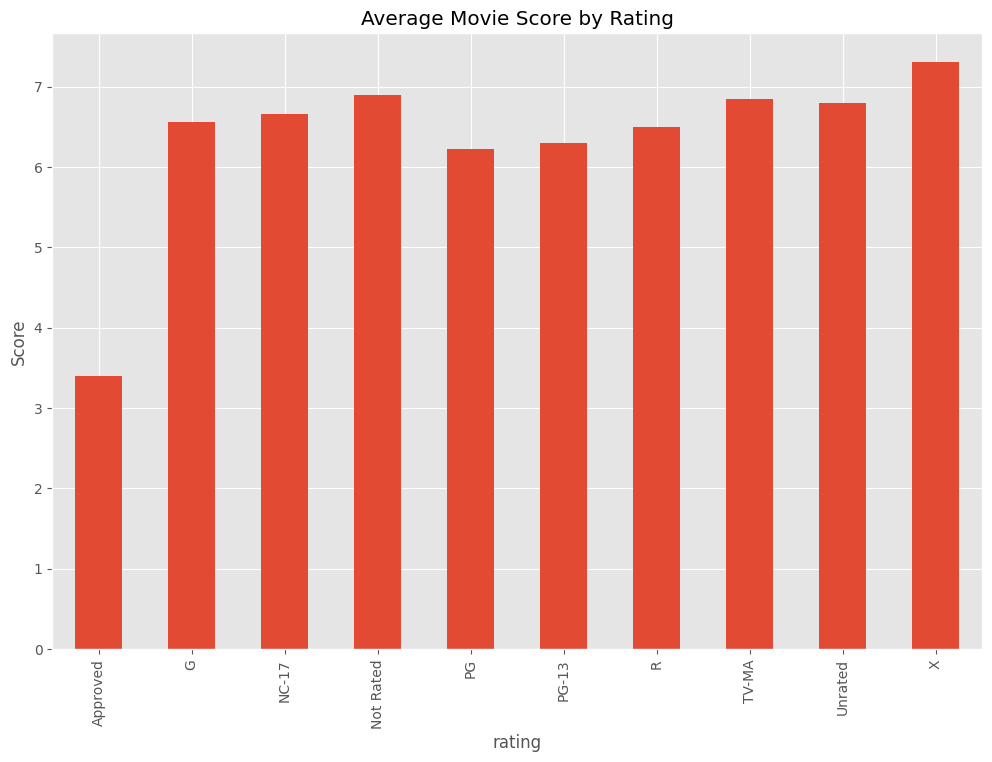

In [33]:
rating_series.plot.bar()
plt.title('Average Movie Score by Rating')
plt.ylabel('Score')

#### It seems X movies provide the highest scored movie while Approved provides the lowest score

In [22]:
df['rating'].value_counts()

R            2597
PG-13        1729
PG            907
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: rating, dtype: int64

#### After looking into the value counts, Approved and X only have one movie each! Must have been an error in the data.  
#### In terms of value count R provides the highest rating while G provides the lowest!

### Genre

In [36]:
genre_series = df.groupby('genre')['score'].mean().sort_values()

Text(0, 0.5, 'Score')

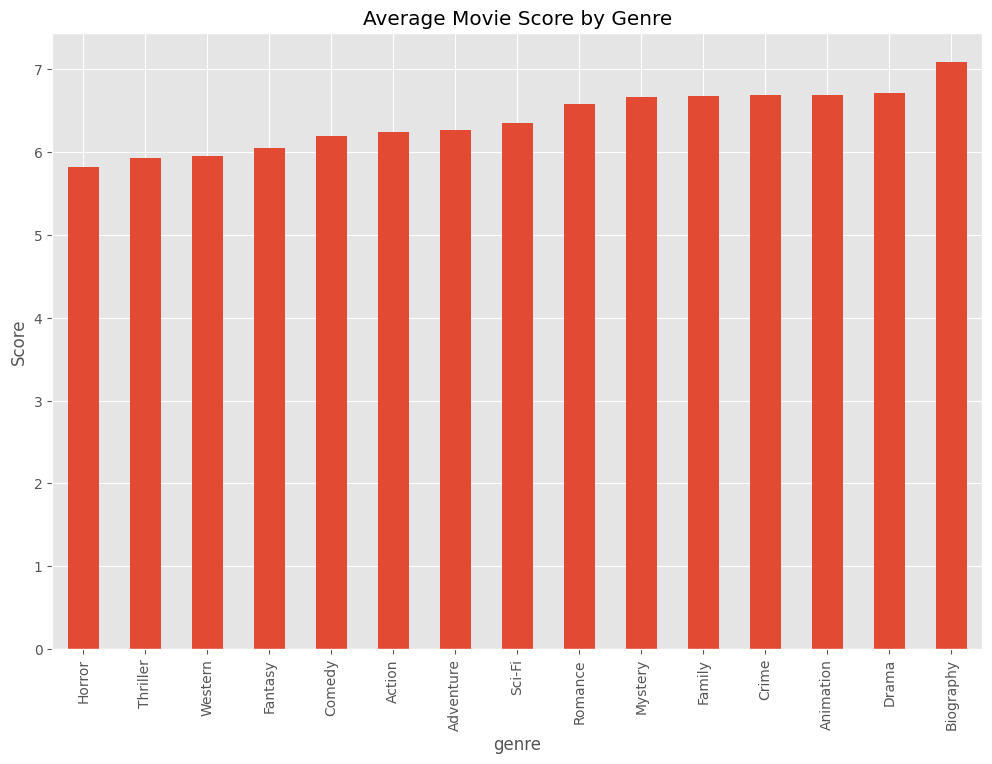

In [37]:
genre_series.plot.bar()
plt.title('Average Movie Score by Genre')
plt.ylabel('Score')

#### Horror provides the lowest average movie score while Biography provides the highest!